Epoch 1/10
5/5 [==============================] - 0s 4ms/step - loss: 5.6277
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 4.4338
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 4.1259
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 4.0382
Epoch 5/10
5/5 [==============================] - 0s 0s/step - loss: 3.9763
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 3.9581
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 3.9536
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 3.9434
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 3.9124
Epoch 10/10
5/5 [==============================] - 0s 0s/step - loss: 3.9175


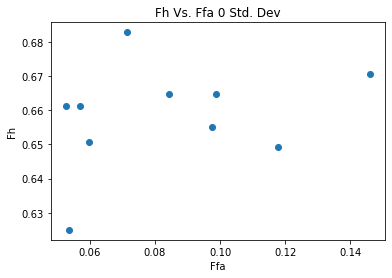

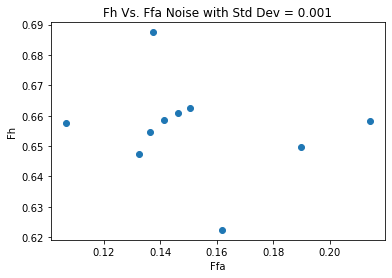

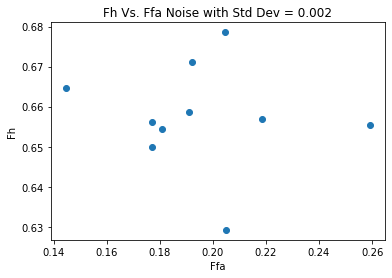

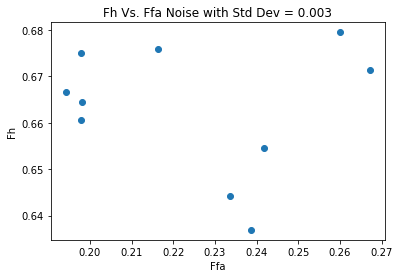

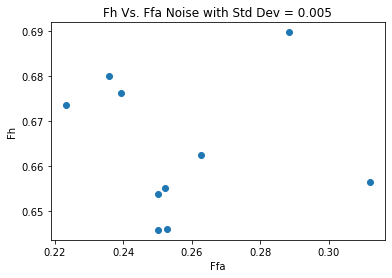

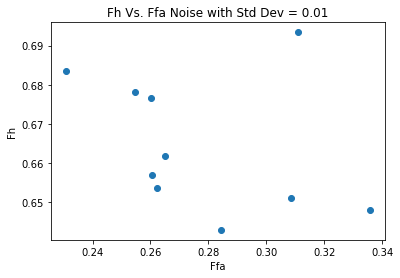

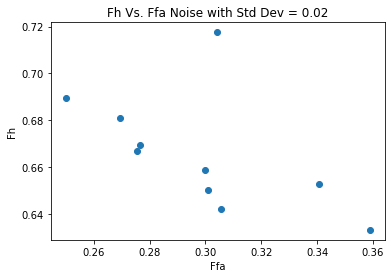

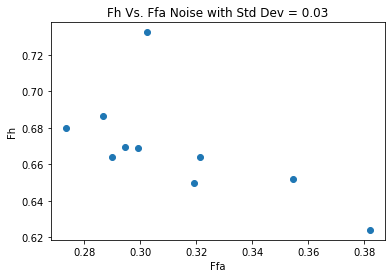

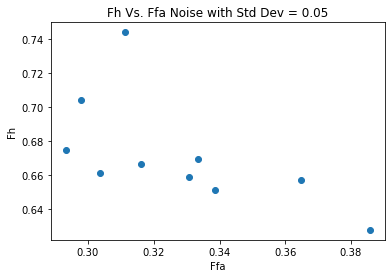

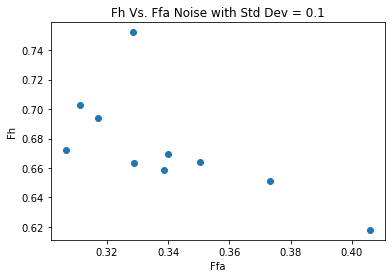

                                                                                                                                             Image    Fh StdDev 0    Ffa StdDev 0    Fh StdDev 0.001    Ffa StdDev 0.001    Fh StdDev 0.002    Ffa StdDev 0.002    Fh StdDev 0.003    Ffa StdDev 0.003    Fh StdDev 0.005    Ffa StdDev 0.005    Fh StdDev 0.01    Ffa StdDev 0.01
--  --------  ---------  --  --------  ---------  --  --------  ---------  --  --------  --------  --  --------  --------  --  --------  ---------  -------------  --------------  -----------------  ------------------  -----------------  ------------------  -----------------  ------------------  -----------------  ------------------  ----------------  -----------------
 0  0.66129   0.0571429   0  0.682796  0.0714286   0  0.664865  0.0985915   0  0.670659  0.146067   0  0.649123  0.117647   0  0.650794  0.0597015              0        0.655172           0.097561                   0           0.625              0.0535714   

In [85]:
import cv2 
from math import *
import math
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from numpy import loadtxt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
import numpy
import random
from tabulate import tabulate

def toBlackWhiteBinary(img):
    for i in range(16):
        for j in range(16):
            if img[i][j] != 255:
                img[i][j] = 0
    return img

def makeBinaryImages():                
    for i in range(10):
        path = list(r"C:\Users\billy_000\Documents\UF\Neural Networks\Assign1\Neural-Networks-Assignment-1\Assignment1\images\x.PNG")
        path[104] = str(i)
        path = "".join(path)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = toBlackWhiteBinary(img)
        cv2.imwrite(path, img)
        
def ImageToArray(img):
    final = []
    for i in range(16):
        for j in range(16):
            final.append(img[i][j])
            
    for i in range(len(final)):
        if final[i] == 255:
            final[i] = 1
        else:
            final[i] = 0
    return final

def compareImage(Original, Output):
    mismatch = 0
    for i in range(len(Original)):
        if Output[i] != Original[i]:
            mismatch += 1
    return mismatch / len(Original)

def DataSetOfAllImages():
    dataset = []
    for i in range(10):
        path = list(r"C:\Users\billy_000\Documents\UF\Neural Networks\Assign1\Neural-Networks-Assignment-1\Assignment1\images\x.PNG")
        path[104] = str(i)
        path = "".join(path)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        dataset.append(ImageToArray(img))
    return dataset

def Threshold(Arr):
    newArr = []
    for i in Arr:
        if i > 0.5:
            newArr.append(1)
        else:
            newArr.append(0)
    return newArr

def ThresholdResultArrays(arrs):
    newArr = []
    for i in arrs:
        newArr.append(Threshold(i))
    return newArr

def CountWhitePixels(img):
    count = 0
    for i in img:
        if i == 0:
            count += 1
    return count

def ComputeFh(correctImage, Output):
    TotalBlackPixels = 0
    TotalCorrectPixels = 0
    
    for i in range(len(correctImage)):
        if correctImage[i] == 1:
            TotalBlackPixels += 1
            if(Output[i] == 1):
                TotalCorrectPixels += 1
    return TotalCorrectPixels / TotalBlackPixels

def ComputeFhArray(correctImages, OutputImages):
    fhArr = []
    for i in range(len(correctImages)):
        fhArr.append(ComputeFh(correctImages[i], OutputImages[i]))
    return fhArr

def ComputeFfa(correctImage, Output):
    TotalWrongPixels = 0
    
    for i in range(len(correctImage)):
        if (Output[i] == 1) and (correctImage[i] != 1):
            TotalWrongPixels += 1
    
    return TotalWrongPixels / CountWhitePixels(correctImage)

def ComputeFfaArray(correctImages, OutputImages):
    ffaArr = []
    for i in range(len(correctImages)):
        ffaArr.append(ComputeFfa(correctImages[i], OutputImages[i]))
    return ffaArr

#Images would be X
def Perturb(images, mean, std_dev):
    
    NoiseCorruptedImages = []
    
    for i in images:
        currentImage = i
        
        mean, std_dev = mean, std_dev

        sample = numpy.random.normal(mean, std_dev, 25)

        RandomImageIndexes = random.sample(range(0, 255), 25)
        
        sampleIndex = 0
        
        for j in RandomImageIndexes:
            currentImage[j] += sample[sampleIndex]
            sampleIndex += 1
        NoiseCorruptedImages.append(currentImage)
        
    return ThresholdResultArrays(NoiseCorruptedImages)
            
    
    
def Model(X, y):
    
    model = Sequential()
    model.add(Dense(256, input_dim = 256, activation='relu'))
    #model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    model.fit(X, y, epochs=10, batch_size=2, verbose = True)
    return model

def RunAnalysis(X, Y, model, plotTitle=None):
    
    FhArray = ComputeFhArray(X, Y)
    FfaArray = ComputeFfaArray(X, Y)
    
    
    #print(FhArray)
    #print(FfaArray)
    
    plt.scatter(FfaArray, FhArray)
    plt.title(plotTitle)
    plt.xlabel("Ffa")
    plt.ylabel("Fh")
    plt.show()
    
    return [FhArray, FfaArray]

def Tabulate(FhArrays, FfaArrays):
    #(["Image 0",FhStdDev0, FfaStdDev0, ..., FhStdDev0.1, FfaStdDev0.1])
    table = []
    for i in range(10):
        newEntry = []
        for j in range(len(FhArrays)):
            newEntry.append(str(i))
            newEntry.append(FhArrays[i][j])
            newEntry.append(FfaArrays[i][j])
        table.append(newEntry)
    print(tabulate(table, headers = ["Image", "Fh StdDev 0", "Ffa StdDev 0", "Fh StdDev 0.001", "Ffa StdDev 0.001",
                                     "Fh StdDev 0.002", "Ffa StdDev 0.002", "Fh StdDev 0.003", "Ffa StdDev 0.003", 
                                     "Fh StdDev 0.005", "Ffa StdDev 0.005", "Fh StdDev 0.01", "Ffa StdDev 0.01"]))
    
def main():
            
    X = numpy.array(DataSetOfAllImages())
    y = X
    
    M = Model(X, y)
    
    #print(X[1])
    Y = ThresholdResultArrays(M.predict(X))
    a = RunAnalysis(X, Y, M, "Fh Vs. Ffa 0 Std. Dev")
    
    
    stdDevs = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
    
    FhArrays = []
    FfaArrays = []
    FhArrays.append(a[0])
    FfaArrays.append(a[1])
    
    for i in stdDevs:
        NoisyImages = Perturb(X, 0, i)
        a = RunAnalysis(NoisyImages, Y, M, "Fh Vs. Ffa Noise with Std Dev = " + str(i))
        FhArrays.append(a[0])
        FfaArrays.append(a[1])
        
    Tabulate(FhArrays, FfaArrays)
 
        
        
        
main()
        
        






